# Data Reduction

Data reduction refers to techniques that reduce the volume or dimensionality of data while preserving its integrity and analytical value.

This is useful when:
- The dataset is too large to process efficiently
- There is redundant or irrelevant information
- You want to improve performance (modeling, storage, visualization)

### 1. Dimensionality Reduction with PCA

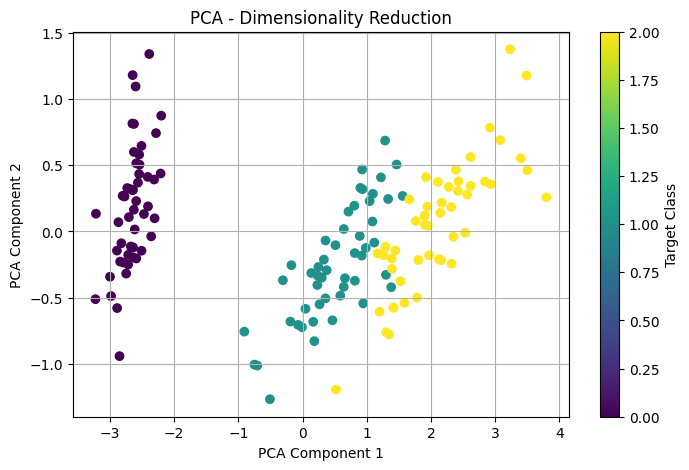

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA - Dimensionality Reduction")
plt.colorbar(label='Target Class')
plt.grid(True)
plt.show()

### 2. Feature Selection (Filter Method: ANOVA F-test)

In [3]:
from sklearn.feature_selection import SelectKBest, f_classif

y = iris.target

# Select top 2 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Show selected features
print("Selected feature scores:", selector.scores_)
print("Selected features:\n", X.iloc[:, selector.get_support()].head())

Selected feature scores: [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
Selected features:
    petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


### 3. Feature Selection (Wrapper Method: RFE)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=2)
rfe.fit(X, y)

# Show selected features
selected_features = X.columns[rfe.support_]
print("Selected features by RFE:", selected_features.tolist())

Selected features by RFE: ['petal length (cm)', 'petal width (cm)']


### 4. Embedded Method (Random Forest Feature Importances)

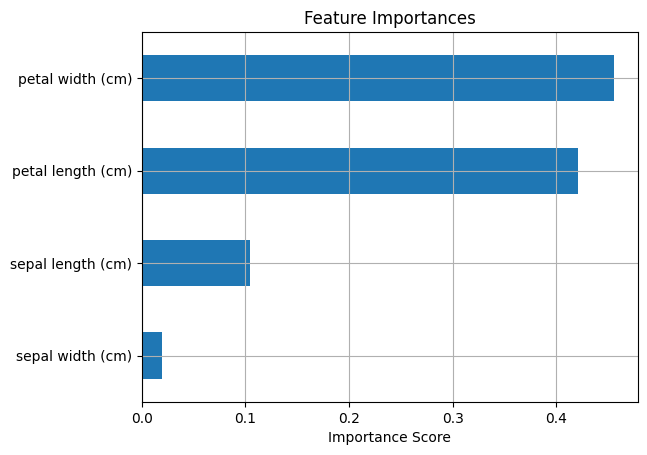

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
model = RandomForestClassifier()
model.fit(X, y)

# Plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title="Feature Importances")
plt.xlabel("Importance Score")
plt.grid(True)
plt.show()

### 5. Instance Reduction (Random Sampling)

In [7]:
# Random sample 50% of data
X_sampled = X.sample(frac=0.5, random_state=42)
print("Sampled data:\n", X_sampled.head())

Sampled data:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73                 6.1               2.8                4.7               1.2
18                 5.7               3.8                1.7               0.3
118                7.7               2.6                6.9               2.3
78                 6.0               2.9                4.5               1.5
76                 6.8               2.8                4.8               1.4


### 6. Binning (Discretization)

In [8]:
from sklearn.preprocessing import KBinsDiscretizer

# Binning sepal length into 3 bins
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X['sepal_length_binned'] = kbins.fit_transform(X[['sepal length (cm)']])

# View original and binned
print(X[['sepal length (cm)', 'sepal_length_binned']].head())

   sepal length (cm)  sepal_length_binned
0                5.1                  0.0
1                4.9                  0.0
2                4.7                  0.0
3                4.6                  0.0
4                5.0                  0.0


### Data Compression & Numerosity Reduction

In [11]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from scipy.sparse import csr_matrix

df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 1. Data Compression
# a. Data type optimization
df_compressed = df.copy()
df_compressed = df_compressed.astype({
    'sepal length (cm)': 'float32',
    'sepal width (cm)': 'float32',
    'petal length (cm)': 'float32',
    'petal width (cm)': 'float32'
})

# b. Sparse matrix representation (for demo, though Iris isn't sparse)
sparse_matrix = csr_matrix(df_compressed.values)

# Display results
print("Original Data Types:\n", df.dtypes)
print("\nCompressed Data Types:\n", df_compressed.dtypes)
print("\nSparse Matrix Shape:", sparse_matrix.shape)

Original Data Types:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

Compressed Data Types:
 sepal length (cm)    float32
sepal width (cm)     float32
petal length (cm)    float32
petal width (cm)     float32
dtype: object

Sparse Matrix Shape: (150, 4)


In [13]:
# 2. Numerosity Reduction
# a. Clustering (KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)

# b. Parametric modeling (Linear Regression)
X = df.drop('petal length (cm)', axis=1)
y = df['petal length (cm)']
model = LinearRegression().fit(X, y)
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_

print("\nKMeans Cluster Centroids:\n", centroids)
print("\nLinear Regression Coefficients:\n", coefficients)
print("\nLinear Regression Intercept:\n", intercept)


KMeans Cluster Centroids:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.901613          2.748387           4.393548          1.433871
1           5.006000          3.428000           1.462000          0.246000
2           6.850000          3.073684           5.742105          2.071053

Linear Regression Coefficients:
 sepal length (cm)    0.729138
sepal width (cm)    -0.646012
petal width (cm)     1.446793
dtype: float64

Linear Regression Intercept:
 -0.2627111975741818


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
